In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


In [29]:
# load the data for nvda stock price
nvda = pd.read_csv('data/NVDA.csv')
nvda['Date'] = pd.to_datetime(nvda['Date'])
nvda = nvda.set_index('Date')
nvda

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400
...,...,...,...,...,...,...
2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100


In [30]:
# remove all coulums except for Adj Close and the Date
nvda = nvda[['Adj Close']]
nvda

,Adj Close
Date,
2000-01-03,0.894608
2000-01-04,0.870721
2000-01-05,0.842055
2000-01-06,0.787112
2000-01-07,0.800251
...,...
2024-04-18,846.710022
2024-04-19,762.000000
2024-04-22,795.179993


In [31]:
# run adfuller test
result = sm.tsa.adfuller(nvda['Adj Close'])
result

(np.float64(1.0220074043331016),
 np.float64(0.9944928094960798),
 33,
 6082,
 {'1%': np.float64(-3.431425643225051),
  '5%': np.float64(-2.86201533660556),
  '10%': np.float64(-2.5670230190487757)},
 np.float64(34159.40239995475))

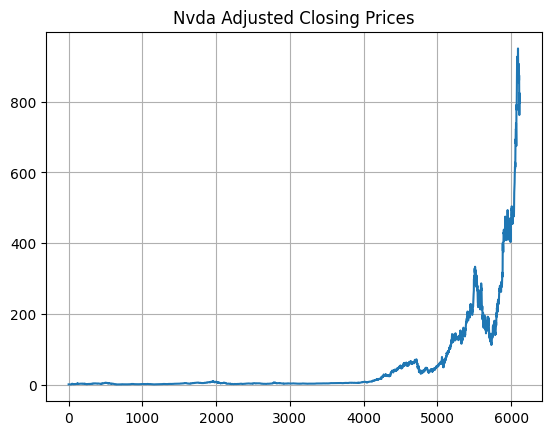

In [32]:
plt.plot(nvda['Adj Close'].values)
plt.title('Nvda Adjusted Closing Prices')
plt.grid();

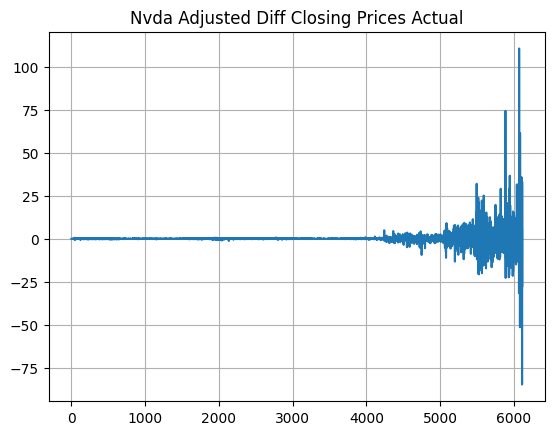

Date
2000-01-04    -0.023887
2000-01-05    -0.028666
2000-01-06    -0.054943
2000-01-07     0.013139
2000-01-10     0.026277
                ...    
2024-04-18     6.360046
2024-04-19   -84.710022
2024-04-22    33.179993
2024-04-23    29.049987
2024-04-24   -27.459960
Name: Adj Close, Length: 6115, dtype: float64

In [33]:
adj_diff = nvda['Adj Close'].diff().dropna()
plt.plot(adj_diff.values)
plt.title('Nvda Adjusted Diff Closing Prices Actual')
plt.grid()
plt.show()
adj_diff

In [34]:
from sklearn.model_selection import train_test_split

y_hist, y_future = train_test_split(adj_diff, shuffle=False)

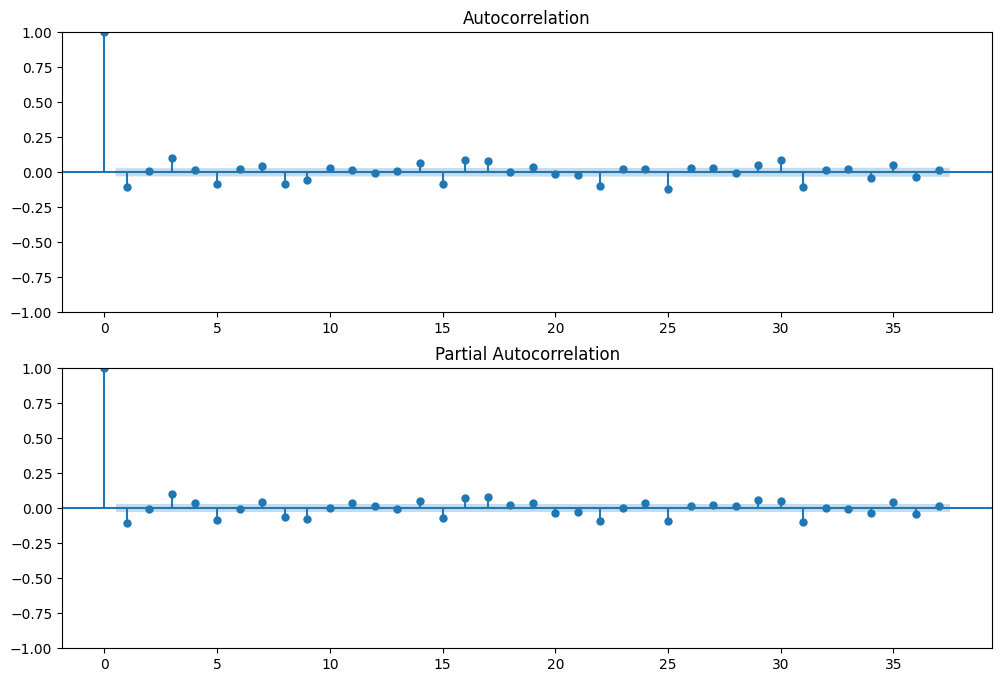

In [35]:
# plot acf and pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(y_hist, ax=ax[0])
sm.graphics.tsa.plot_pacf(y_hist, ax=ax[1], method = 'ywm')
plt.show()


In [36]:
# produce arima model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_hist, order=(1, 1, 1))
results = model.fit()
results.summary()

/Users/georgeli/code/timeseries-cpi-example/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/georgeli/code/timeseries-cpi-example/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/georgeli/code/timeseries-cpi-example/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 4586
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1284.263
Date:                Tue, 18 Jun 2024   AIC                           2574.527
Time:                        19:53:41   BIC                           2593.818
Sample:                             0   HQIC                          2581.318
                               - 4586                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1180      0.003    -34.838      0.000      -0.125      -0.111
ma.L1         -0.9962      0.000  -2160.494      0.000      -0.997      -0.995
sigma2         0.1024      0.000    280.770      0.000       0.102       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            948418.80
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              24.19   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        73.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
future_preds = results.forecast(steps = len(y_future))

/Users/georgeli/code/timeseries-cpi-example/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/georgeli/code/timeseries-cpi-example/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


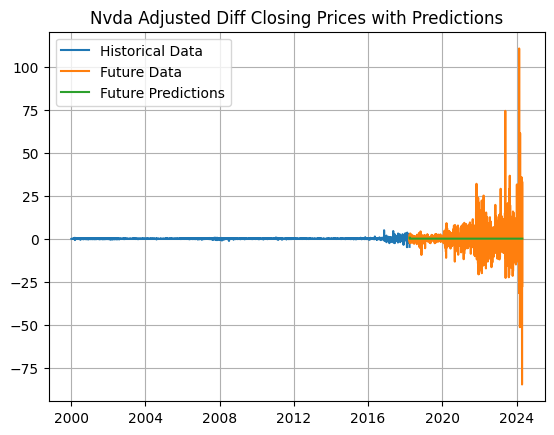

In [38]:
# plot the existing data and the future predictions
plt.plot(y_hist.index, y_hist.values, label='Historical Data')
plt.plot(y_future.index, y_future.values, label='Future Data')
plt.plot(y_future.index, future_preds, label='Future Predictions')
plt.title('Nvda Adjusted Diff Closing Prices with Predictions')
plt.legend()
plt.grid()
plt.show()

In [39]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_future, future_preds)
pred_error = y_future.values - future_preds
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())

print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}')

MSE: 68.57461298022707, RMSE: 8.280978986824389, MAE: 4.469559893153816
